In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path = 'Datasets\Train'
valid_path = 'Datasets\Test'


In [4]:
# Import the resnet50 library as shown below and add preprocessing layer to the front of resnet50
# Here we will be using imagenet weights
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [6]:
# don't train existing weights
for layer in resnet.layers:
      layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

In [8]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [9]:
len(folders)

3

In [10]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [12]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [16]:
test_set = test_datagen.flow_from_directory('Datasets\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 58 images belonging to 3 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Indhu\AppData\Local\Temp/ipykernel_4416/4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 27s 15s/step - loss: 5.1359 - accuracy: 0.2812 - val_loss: 12.8729 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 18s 13s/step - loss: 14.2870 - accuracy: 0.3906 - val_loss: 8.4489 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 18s 13s/step - loss: 5.8518 - accuracy: 0.3906 - val_loss: 3.2143 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 18s 13s/step - loss: 5.4337 - accuracy: 0.3281 - val_loss: 9.2411 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 18s 13s/step - loss: 8.1313 - accuracy: 0.3750 - val_loss: 7.3738 - val_accuracy: 0.5172
Epoch 6/50
2/2 [==============================] - 18s 13s/step - loss: 7.1369 - accuracy: 0.3438 - val_loss: 3.4706 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 18s 13s/step - loss: 2.5657 - accuracy: 0.5000 - val_loss: 3.5900 - val_accuracy: 0.3276
Epoch 8/50
2/2 [=========

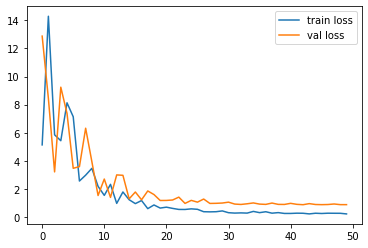

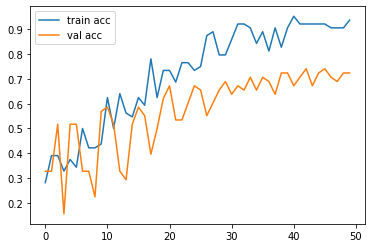

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [20]:
y_pred = model.predict(test_set)

In [21]:
y_pred

array([[2.3399045e-01, 4.3828717e-01, 3.2772234e-01],
       [1.1256968e-02, 2.4009126e-01, 7.4865168e-01],
       [5.3701024e-03, 4.3761771e-02, 9.5086813e-01],
       [1.5496376e-02, 9.4489431e-01, 3.9609324e-02],
       [1.2547856e-02, 5.8796936e-01, 3.9948276e-01],
       [8.3942622e-01, 8.1026055e-02, 7.9547651e-02],
       [7.6924576e-03, 9.1073412e-01, 8.1573434e-02],
       [8.4559858e-02, 1.2089866e-01, 7.9454142e-01],
       [6.0626591e-04, 8.2043314e-01, 1.7896058e-01],
       [1.3398005e-02, 3.2717073e-03, 9.8333031e-01],
       [5.8772765e-02, 1.9547988e-02, 9.2167920e-01],
       [2.7890038e-02, 5.9726578e-01, 3.7484419e-01],
       [1.8429806e-02, 4.2616695e-04, 9.8114407e-01],
       [6.0982674e-01, 3.1005153e-01, 8.0121808e-02],
       [4.7544469e-03, 5.4436755e-01, 4.5087796e-01],
       [5.0162491e-03, 9.9371111e-01, 1.2725641e-03],
       [4.7057956e-03, 9.1740811e-01, 7.7886112e-02],
       [8.5679710e-02, 7.2539467e-01, 1.8892567e-01],
       [5.6296077e-02, 1.500

In [22]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred


array([1, 2, 2, 1, 1, 0, 1, 2, 1, 2, 2, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2,
       2, 0, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1,
       0, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 1, 1], dtype=int64)

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('model_resnet50.h5')

In [84]:
img=image.load_img('Datasets/Test/mercedes/27.jpg',target_size=(224,224))

In [85]:
img_data

array([[[[-103.6841  , -116.54763 , -122.934906],
         [-103.707634, -116.56332 , -122.9702  ],
         [-103.73116 , -116.582924, -123.00157 ],
         ...,
         [-103.38606 , -116.2339  , -123.17412 ],
         [-103.14292 , -115.99076 , -122.930984],
         [-103.28018 , -116.12802 , -123.06824 ]],

        [[-103.78214 , -116.6339  , -123.05255 ],
         [-103.786064, -116.6339  , -123.06824 ],
         [-103.789986, -116.62998 , -123.08392 ],
         ...,
         [-103.40567 , -116.25351 , -123.193726],
         [-103.41351 , -116.26135 , -123.20157 ],
         [-103.58606 , -116.4339  , -123.374115]],

        [[-103.78214 , -116.6339  , -123.05255 ],
         [-103.786064, -116.6339  , -123.06824 ],
         [-103.789986, -116.62998 , -123.08392 ],
         ...,
         [-103.40567 , -116.25351 , -123.193726],
         [-103.41351 , -116.26135 , -123.20157 ],
         [-103.58606 , -116.4339  , -123.374115]],

        ...,

        [[-103.539   , -116.38684 , -1

In [86]:
x=image.img_to_array(img)
x

array([[[122., 111.,  89.],
        [117., 106.,  84.],
        [102.,  91.,  69.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[124., 113.,  91.],
        [119., 108.,  86.],
        [105.,  94.,  72.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[127., 116.,  94.],
        [123., 112.,  90.],
        [111., 100.,  78.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[113., 116., 121.],
        [113., 116., 121.],
        [113., 116., 121.],
        ...,
        [152., 155., 160.],
        [152., 155., 160.],
        [152., 155., 160.]],

       [[112., 115., 120.],
        [112., 115., 120.],
        [112., 115., 120.],
        ...,
        [152., 155., 160.],
        [152., 155., 160.],
        [152., 155., 160.]],

       [[112., 115., 120.],
        [112., 115., 120.],
        [112., 1

In [87]:
x.shape

(224, 224, 3)

In [88]:
x=x/255

In [89]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [90]:
model.predict(img_data)

array([[0.0096393 , 0.00206593, 0.98829484]], dtype=float32)

In [91]:
a=np.argmax(model.predict(img_data), axis=1)

In [93]:
a

array([2], dtype=int64)